In [26]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist
import pandas as pd
import numpy as np

In [27]:
# Import your data.csv 
file_path = r'C:\Users\20224751\Downloads\EIS_data_py.csv'

df = pd.read_csv(file_path)
print(df.to_string()) 

        freq/Hz  Re(Z)/Ohm  Im(Z)/Ohm
0   200000.0000      0.431   -2.43000
1   135000.0000      0.413   -1.65000
2    91700.0000      0.408   -1.11000
3    62100.0000      0.407   -0.73500
4    42100.0000      0.411   -0.47700
5    28500.0000      0.418   -0.29500
6    19300.0000      0.431   -0.16500
7    13100.0000      0.448   -0.06820
8     8850.0000      0.470    0.00514
9     5990.0000      0.498    0.06530
10    4060.0000      0.532    0.11800
11    2750.0000      0.578    0.16700
12    1860.0000      0.638    0.21100
13    1260.0000      0.715    0.24300
14     853.0000      0.801    0.25400
15     578.0000      0.884    0.24500
16     391.0000      0.955    0.21900
17     265.0000      1.010    0.18900
18     179.0000      1.040    0.16300
19     122.0000      1.070    0.14500
20      82.3000      1.100    0.13700
21      55.7000      1.120    0.13800
22      37.7000      1.150    0.14500
23      25.6000      1.180    0.16100
24      17.3000      1.220    0.17900
25      11.7

In [28]:
# Remove white spaces from each column name
df.columns = [col.strip() for col in df.columns]
print(df.columns)

Index(['freq/Hz', 'Re(Z)/Ohm', 'Im(Z)/Ohm'], dtype='object')


In [29]:
df.columns

Index(['freq/Hz', 'Re(Z)/Ohm', 'Im(Z)/Ohm'], dtype='object')

In [30]:
data = df.loc[(df['Im(Z)/Ohm'])>-0.06]

In [31]:
z=data['Re(Z)/Ohm'].values-1j*data['Im(Z)/Ohm'].values
print(z.shape)

(33,)


In [32]:
f_data = df.loc[(df['freq/Hz'])<13100.0000] #<13000
a_f= np.array(f_data['freq/Hz'])
print(a_f.shape)

(33,)


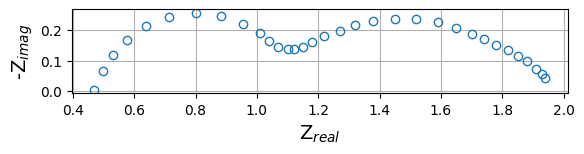

In [33]:
fig, ax = plt.subplots()
ax.plot(z.real, -z.imag, marker='o',mfc='none',ls='none')
ax.set_xlabel(r'Z$_{real}$', size=14)
ax.set_ylabel(r'-Z$_{imag}$',size=14)
ax.set_aspect('equal')
plt.grid()

In [68]:
# Circuit for the fit
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,CPE1)-p(R2-Wo1,CPE2)'
initial_guess = [1e-9, .05, 1e-5, 0.1, .5, .05, 1, 1e-2, 0.8]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

### Fitting

Freq is used in the model together with Z (impedance- uses ReZ and ImZ)

In [62]:
print(z.shape)
print(a_f.shape)

(33,)
(33,)


In [63]:
# Fit results
circuit.fit(a_f, z)
print(circuit)


Circuit string: R0-p(R1,CPE1)-p(R2-Wo1,CPE2)
Fit: True

Initial guesses:
     R0 = 1.00e-09 [Ohm]
     R1 = 5.00e-02 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e-01 []
     R2 = 5.00e-01 [Ohm]
  Wo1_0 = 5.00e-02 [Ohm]
  Wo1_1 = 1.00e+00 [sec]
  CPE2_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []

Fit parameters:
     R0 = 4.93e-01  (+/- 7.93e-03) [Ohm]
     R1 = 9.66e-01  (+/- 3.30e-02) [Ohm]
  CPE1_0 = 1.99e-01  (+/- 8.38e-03) [Ohm^-1 sec^a]
  CPE1_1 = 5.72e-01  (+/- 1.96e-02) []
     R2 = 5.15e-01  (+/- 1.96e-02) [Ohm]
  Wo1_0 = 4.68e-10  (+/- 6.36e-02) [Ohm]
  Wo1_1 = 7.22e+01  (+/- 3.51e-13) [sec]
  CPE2_0 = 4.62e-04  (+/- 8.76e-05) [Ohm^-1 sec^a]
  CPE2_1 = 9.62e-01  (+/- 2.45e-02) []



In [64]:
Z_fit = circuit.predict(a_f)
print(Z_fit)

[0.50946543-0.06512047j 0.5196172 -0.09151661j 0.5377566 -0.12663042j
 0.56984609-0.17034876j 0.62333536-0.21767171j 0.70124755-0.25568214j
 0.79534061-0.26935139j 0.88549392-0.25423851j 0.95647607-0.22171246j
 1.0056549 -0.18777324j 1.04014993-0.16148275j 1.06641333-0.14618373j
 1.09119032-0.14052732j 1.11710718-0.14326204j 1.14667581-0.15242436j
 1.18117182-0.16603898j 1.22242121-0.1825278j  1.27048839-0.19966696j
 1.32483139-0.21519751j 1.38550438-0.2272723j  1.44992249-0.2339112j
 1.51583695-0.23407915j 1.58134005-0.227483j   1.64312115-0.21481974j
 1.69909245-0.19757361j 1.7484488 -0.17738583j 1.79091397-0.1558629j
 1.82625509-0.13465987j 1.85555284-0.1145268j  1.8793446 -0.09625923j
 1.9034386 -0.07578282j 1.91798692-0.06234235j 1.92955871-0.05101215j]


In [65]:
Zreal_fit=Z_fit.real
Zimm_fit=-Z_fit.imag
print(Zreal_fit)
print(Zimm_fit)

[0.50946543 0.5196172  0.5377566  0.56984609 0.62333536 0.70124755
 0.79534061 0.88549392 0.95647607 1.0056549  1.04014993 1.06641333
 1.09119032 1.11710718 1.14667581 1.18117182 1.22242121 1.27048839
 1.32483139 1.38550438 1.44992249 1.51583695 1.58134005 1.64312115
 1.69909245 1.7484488  1.79091397 1.82625509 1.85555284 1.8793446
 1.9034386  1.91798692 1.92955871]
[0.06512047 0.09151661 0.12663042 0.17034876 0.21767171 0.25568214
 0.26935139 0.25423851 0.22171246 0.18777324 0.16148275 0.14618373
 0.14052732 0.14326204 0.15242436 0.16603898 0.1825278  0.19966696
 0.21519751 0.2272723  0.2339112  0.23407915 0.227483   0.21481974
 0.19757361 0.17738583 0.1558629  0.13465987 0.1145268  0.09625923
 0.07578282 0.06234235 0.05101215]


In [66]:
zreal=z.real
zimag=-z.imag
print(zreal)
print(zimag)

[0.47  0.498 0.532 0.578 0.638 0.715 0.801 0.884 0.955 1.01  1.04  1.07
 1.1   1.12  1.15  1.18  1.22  1.27  1.32  1.38  1.45  1.52  1.59  1.65
 1.7   1.74  1.78  1.82  1.85  1.88  1.91  1.93  1.94 ]
[0.00514 0.0653  0.118   0.167   0.211   0.243   0.254   0.245   0.219
 0.189   0.163   0.145   0.137   0.138   0.145   0.161   0.179   0.196
 0.215   0.229   0.236   0.236   0.224   0.207   0.187   0.169   0.151
 0.135   0.116   0.0972  0.0737  0.0555  0.0421 ]


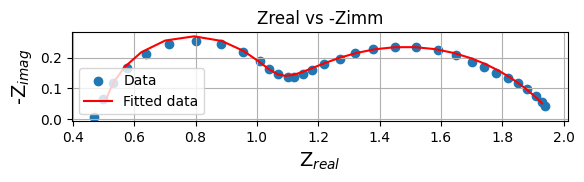

In [67]:
fig, ax = plt.subplots()
plt.scatter(zreal, zimag, label='Data')
plt.plot(Zreal_fit, Zimm_fit, label='Fitted data', color='red')
ax.set_xlabel(r'Z$_{real}$', size=14)
ax.set_ylabel(r'-Z$_{imag}$',size=14)
plt.title('Zreal vs -Zimm')
ax.set_aspect('equal')
plt.legend()
plt.grid()
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(zimag, Zimm_fit)
print("Mean Squared Error:", mse)